## 1 - Transformações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox

Vamos carregar uma base de dados clássica sobre quantidade de passageiros em voos comerciais entre 1949 e 1960

In [2]:
df = pd.read_csv('airline_passengers.csv', parse_dates=True, index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


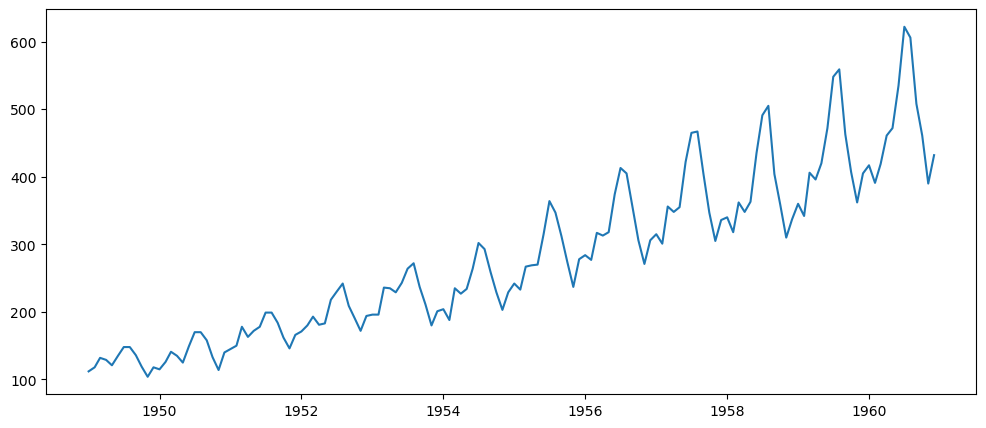

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df.Passengers);

Vemos que a série temporal claramente é **não estacionária**, pois a tendência é crescente. Além disso há a presença de **sazonalidade**, ficando mais evidente ao longo do tempo.

Na modelagem estatística de séries temporais é desejável que elas sejam estacionárias. Definimos estacionariedade como em Bueno, pág 16-17. Basicamente demandamos que a série tenha média constante, que a variância seja constante e a autocovariância não mude ao longo do tempo.

Quando uma série é não estacionária, podemos realizar algumas transformações visando deixá-la estacionária. Algumas dessas transformações são a logarítmica, exponencial, potenciação e a de Box-Cox. Futuramente veremos também a diferenciação dos dados da série $(y_t - y_{t-1})$ como uma transformação. Também veremos tratamento para sazonalidade.

#### Potenciação

Transformamos usando $\overline{y}_t = {y_t}^{\gamma}$ para algum valor escolhido de $\gamma$ e tentamos deixar a série mais linear possível.

Por exemplo, se supomos que nossa série tem uma tendência quadrática de crescimento, uma saída seria tentar a potenciação com $\gamma = 0.5$.

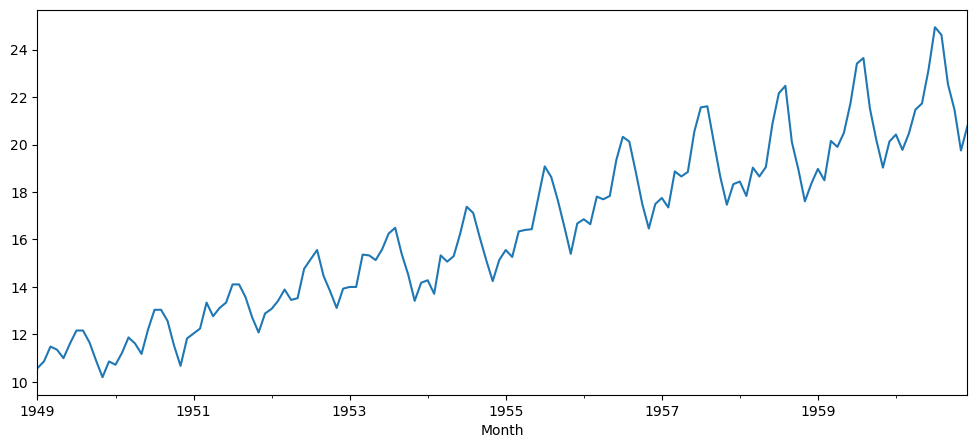

In [4]:
df['sqrtPassengers'] = np.sqrt(df.Passengers)
df.sqrtPassengers.plot(figsize = (12,5));

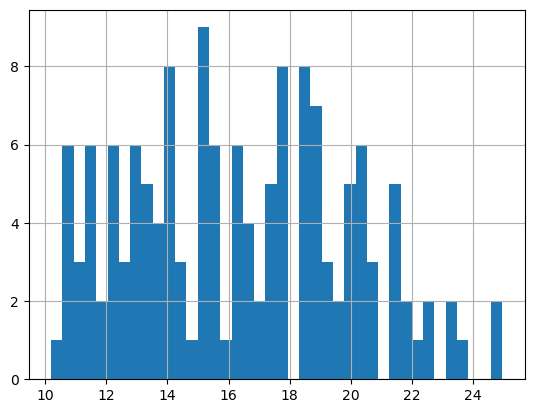

In [5]:
df.sqrtPassengers.hist(bins=40);

#### Logarítmica

Outra possível transformação na série se acreditamos haver alguma tendência exponencial. Como o log é uma função de números positivos, precisamos garantir que a série é positiva e, caso não seja, somamos alguma constante positiva para garantir.

Exemplo: $\overline{y}_t = \ln {y_t}$ ou $\overline{y}_t = \ln {(y_t + \alpha)}$ com $\alpha > | \min{y_t} |$.

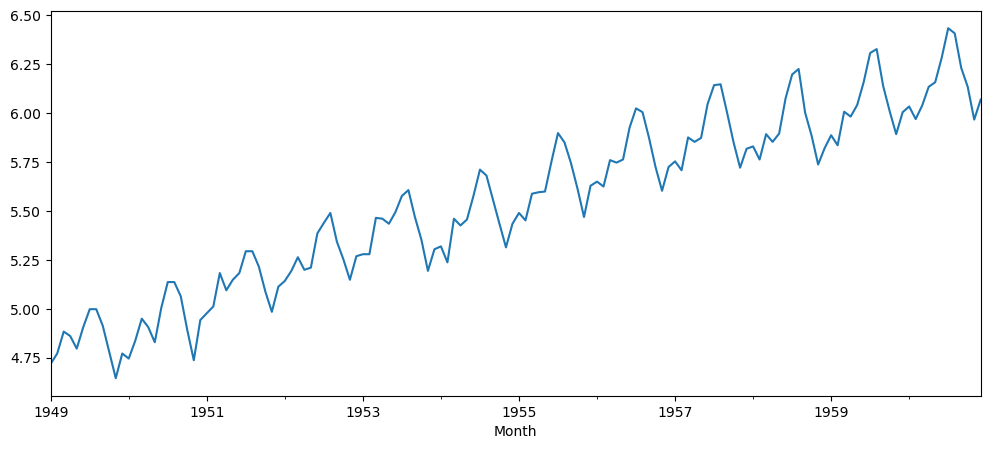

In [6]:
df['logPassengers'] = np.log(df.Passengers)
df.logPassengers.plot(figsize = (12,5));

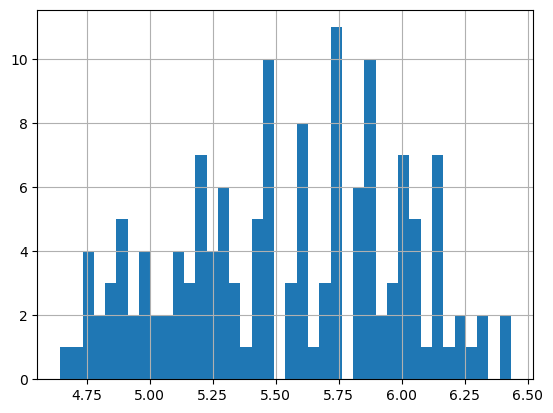

In [7]:
df.logPassengers.hist(bins=40);

#### Transformação de Box-Cox

Essa transformação é descrita por

$\overline{y}_t = \frac{y_t^{\lambda} - 1 }{\lambda}$ se $\lambda \neq 0;$

$\overline{y}_t = \log{y_t}$ se $\lambda = 0$


Escolha automática de lambda:

In [8]:
data, lamb = boxcox(df.Passengers)
print(lamb)

0.14802265137037945


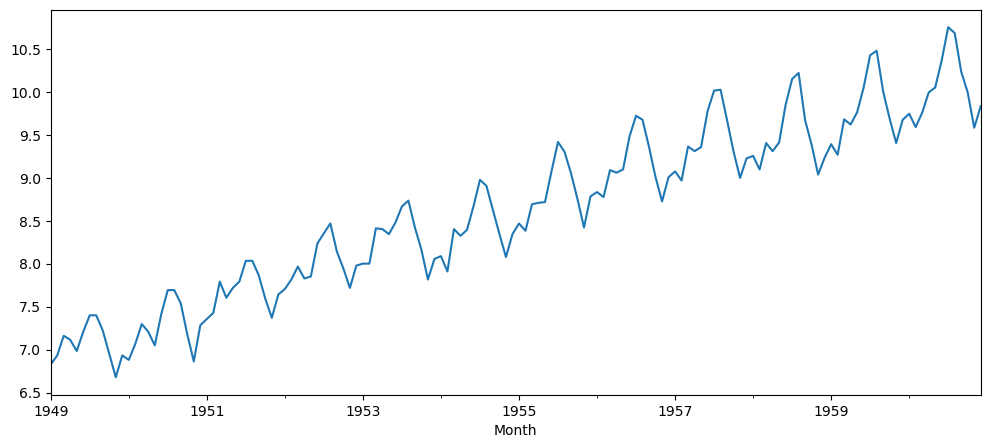

In [9]:
df['bcPassengers']=data
df.bcPassengers.plot(figsize = (12,5));

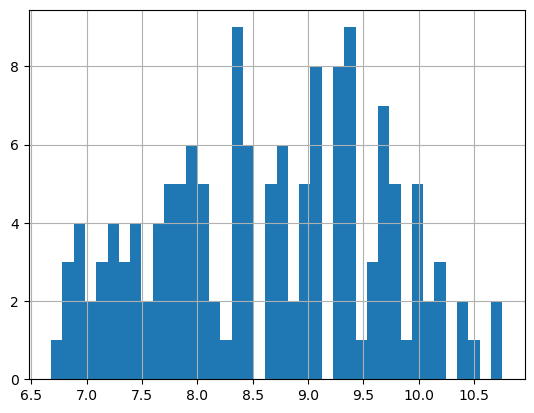

In [10]:
df.bcPassengers.hist(bins=40);

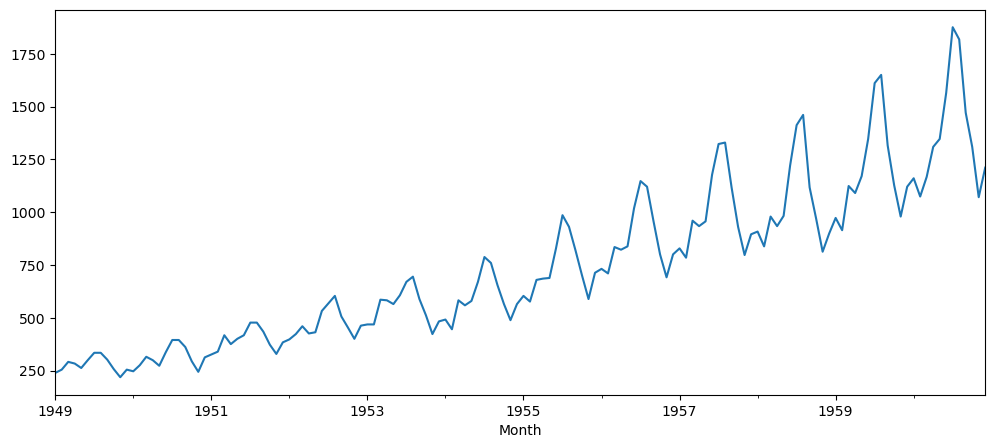

In [11]:
data = boxcox(df.Passengers, lmbda=1.2)
df['bc_lPassengers']=data
df.bc_lPassengers.plot(figsize = (12,5));

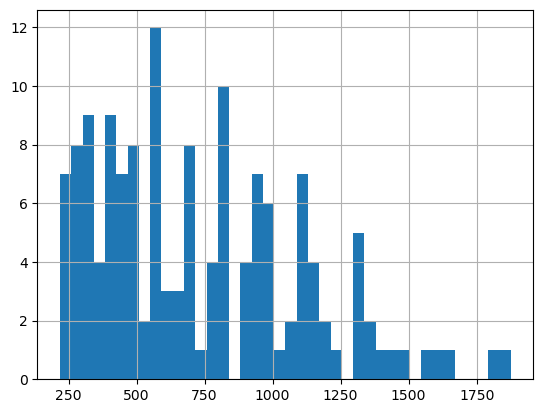

In [12]:
df.bc_lPassengers.hist(bins=40);

## Random Walk

In [13]:
# time steps
T=1000
# valor inicial
p0=10

#### Random Walk sem drift

$y_t = y_{t-1} + \epsilon_t$ onde $\epsilon_t \sim N(0,\sigma^2)$.

Desenvolvendo a equação temos $E(y_t) = y_0$ e $Var(y_t) = t\sigma^2$.

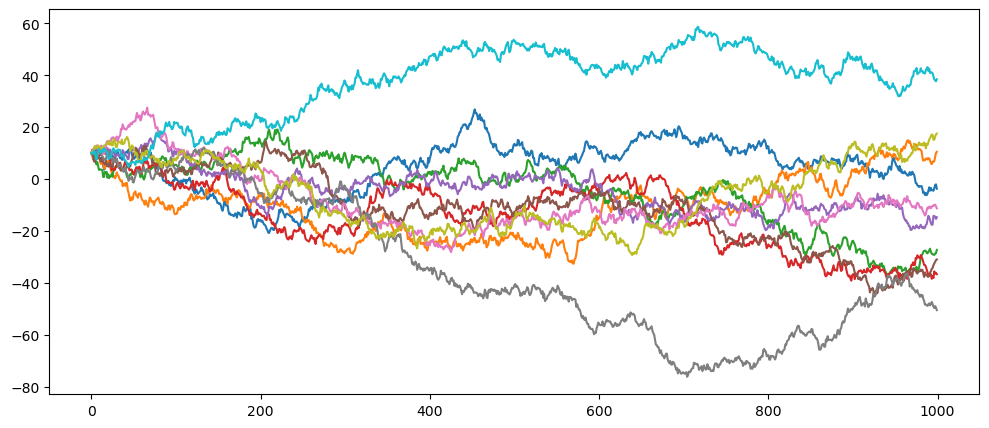

In [14]:
# Random walk sem deslocamento (drift)
p = np.zeros(T)
p[0]=p0
plt.figure(figsize=(12,5))
for j in range(10):
    for i in range(T-1):
        p[i+1] = np.random.randn()+p[i]
    plt.plot(p)
    



#### Random Walk com drift

$y_t = y_{t-1} + \mu + \epsilon_t$ onde $\epsilon_t \sim N(0,\sigma^2)$.

Desenvolvendo a equação temos $E(y_t) = y_0 + t \mu$ e $Var(y_t) = t\sigma^2$.

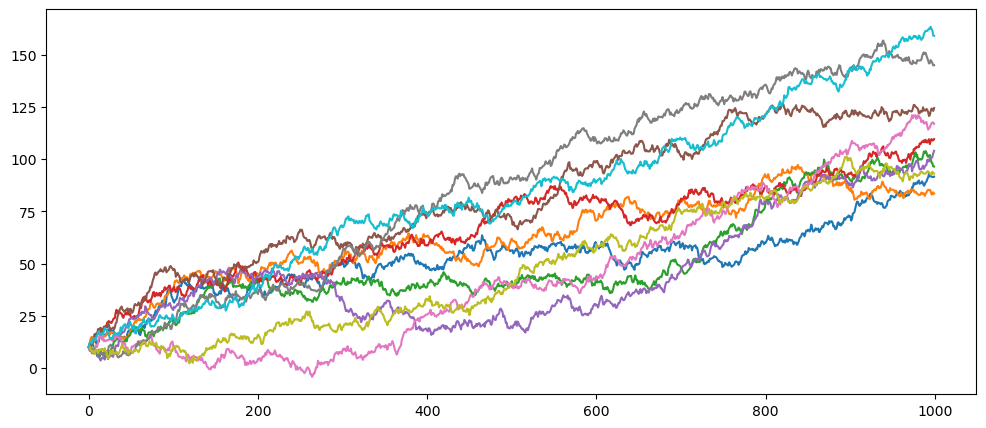

In [15]:
# Random walk com deslocamento (drift)
p = np.zeros(T)
p[0]=p0
mu=1e-1
plt.figure(figsize=(12,5))
for j in range(10):
    for i in range(T-1):
        p[i+1] = np.random.randn()+p[i]+mu
    plt.plot(p)

#### Uma transformação interessante (aplicada em finanças)

Suponha que o passeio aleatório com drift represente o preço de um ativo qualquer. É natural nos preocuparmos apenas com o retorno de tal ativo e não com o preço em si, daí consideramos $R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$. O retorno bruto é $1+R_t = \frac{P_t}{P_{t-1}}$.


É habitual em finanças considerar o log retorno: $r_t = \log({1+R_t}) = \log{(\frac{P_t}{P_{t-1}})} = p_t - p_{t-1}$

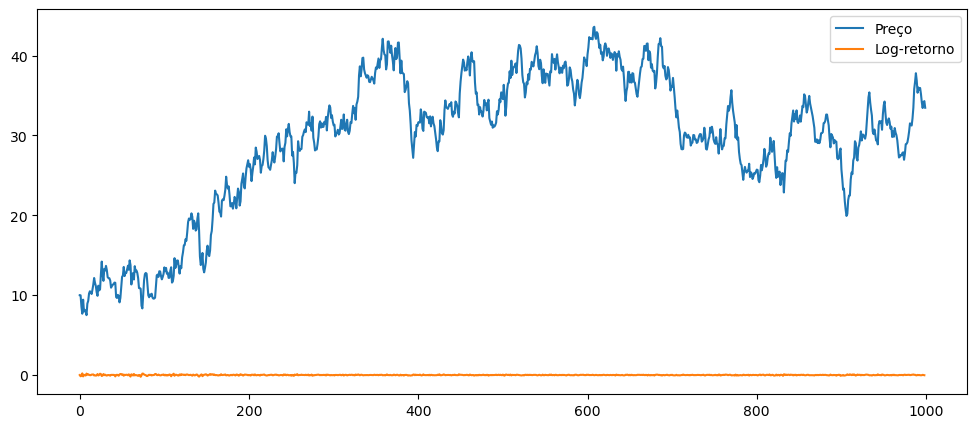

In [16]:
p = np.zeros(T)
p[0]=p0
mu=0.75e-1

for i in range(T-1):
    p[i+1] = np.random.randn()+p[i]+mu
    
logP = np.diff(np.log(p))

plt.figure(figsize=(12,5))
plt.plot(p, label='Preço');
plt.plot(logP, label='Log-retorno');
plt.legend();


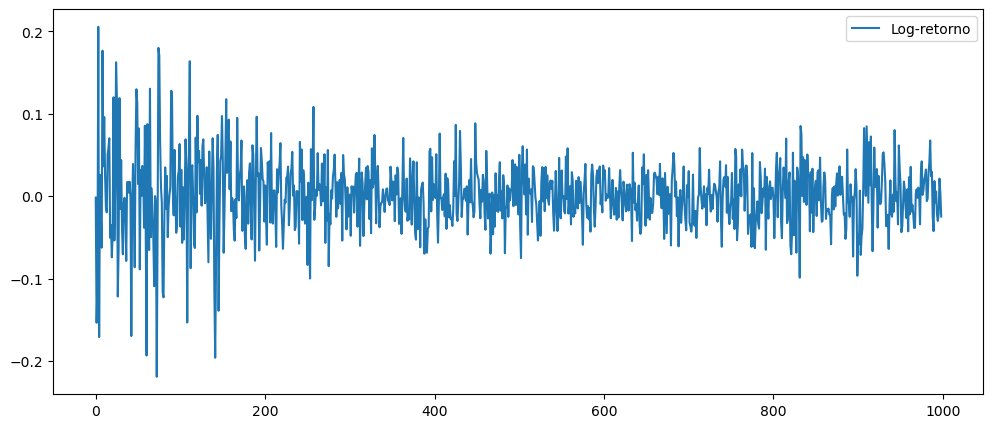

In [17]:
plt.figure(figsize=(12,5))
plt.plot(logP, label='Log-retorno');
plt.legend();

## 2 - Simple Moving Average (SMA)

As vezes, para tentar capturar alguns sinais da série temporal e tentar realizar previsões, não precisamos de informação da série inteira. Muitas vezes se considerarmos uma janela temporal específica teremos uma série suavizada e com propriedades úteis.

**Exemplo:** se desejamos calcular a média móvel de 8 dias:
* $\overline{y}_1 = \frac{y_1 + y_2 + \cdots + y_8}{8}$

* $\overline{y}_n = \frac{y_n + y_{n+1} + \cdots + y_{n+8}}{8}$

In [18]:
df = pd.DataFrame(p,columns=['Preço'])
df.head()

,Preço
0,10.000000
1,9.983554
2,8.563603
3,7.681516
4,9.434410


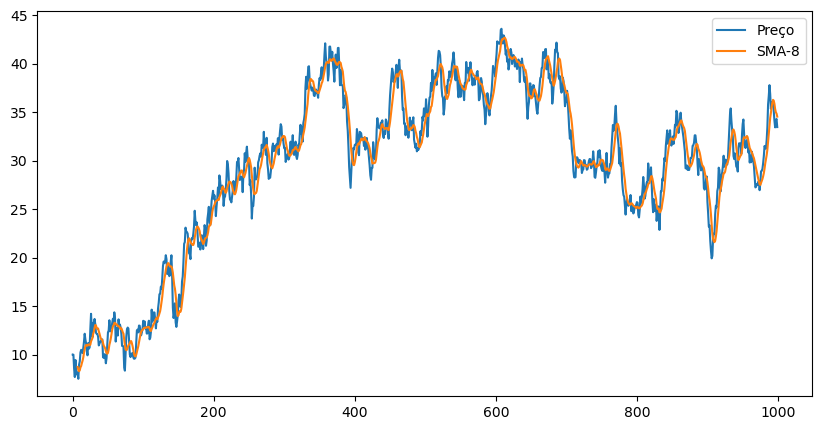

In [19]:
df['SMA-8'] = df['Preço'].rolling(8).mean()
df.plot(figsize=(10,5));

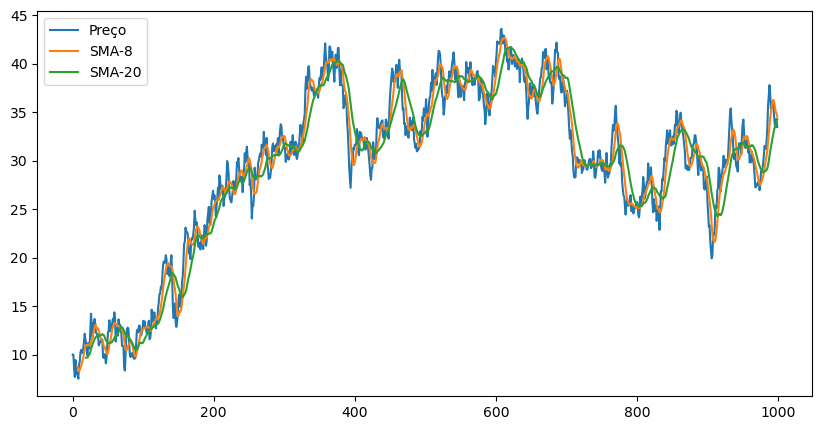

In [20]:
df['SMA-20'] = df['Preço'].rolling(20).mean()
df.plot(figsize=(10,5));